Libraries

In [1]:
# Standard libraries
from cellpose import models, core, plot, utils

from skimage import exposure

import numpy as np
import matplotlib.pyplot as plt

# Custom packages
from auxiliary.data.dataset_ht import HtDataset
from auxiliary.data.imaging import read_nii

# Configurations
use_gpu = core.use_gpu()
print(f"GPU activated: {use_gpu}")

from cellpose.io import logger_setup
logger_setup();

GPU activated: True
2024-07-22 09:36:53,388 [INFO] WRITING LOG OUTPUT TO /home/imarcoss/.cellpose/run.log
2024-07-22 09:36:53,389 [INFO] 
cellpose version: 	3.0.10 
platform:       	linux 
python version: 	3.10.14 
torch version:  	2.3.1+cu118


In [5]:
ds = HtDataset()
ds.check_specimens()

img_idx = 0
img_path = ds.missing_nuclei[img_idx]
img_path_out = ds.missing_nuclei_out[img_idx]

img = read_nii(img_path)
print(img.shape)

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2024-07-22 09:37:59,075 [INFO] pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
(1024, 1024, 633, 1)


In [6]:
model = models.Cellpose(gpu=use_gpu, model_type='nuclei')

2024-07-22 09:38:11,631 [INFO] ** TORCH CUDA version installed and working. **
2024-07-22 09:38:11,632 [INFO] >>>> using GPU
2024-07-22 09:38:11,634 [INFO] >> nuclei << model set to be used
2024-07-22 09:38:11,737 [INFO] >>>> loading model /home/imarcoss/.cellpose/models/nucleitorch_0
2024-07-22 09:38:11,870 [INFO] >>>> model diam_mean =  17.000 (ROIs rescaled to this size during training)


In [7]:
# img_equalized = cv2.equalizeHist(img)
img_equalized = exposure.equalize_hist(img)

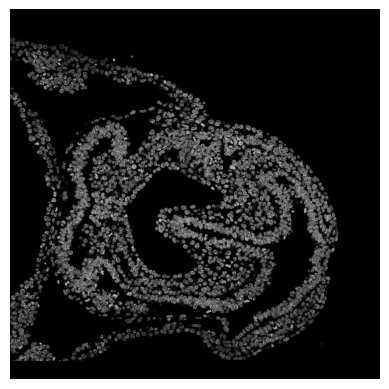

In [8]:
plt.imshow(img[:, :, 270, 0], cmap='gray')
plt.axis('off')
plt.show()

In [9]:
print(img_equalized.shape)

(1024, 1024, 633, 1)


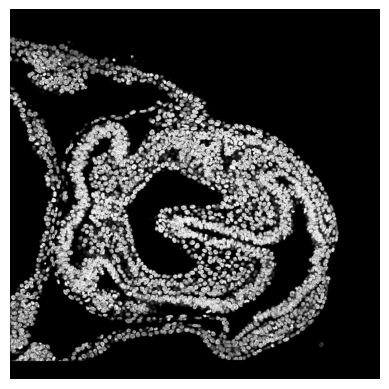

In [10]:
plt.imshow(img_equalized[:, :, 270, 0], cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
masks, flows, styles, diams = model.eval(
    img_equalized, diameter=25, channels=[0, 0], 
    do_3D=True, normalize=True
)

# masks_stitched, flows_stitched, styles_stitched, _ = model.eval(
# img_equalized, channels=[0, 0], diameter=25, do_3D=False, 
# stitch_threshold=0.5, normalize = True
# )

2024-07-22 09:50:23,734 [INFO] channels set to [0, 0]
2024-07-22 09:50:23,736 [INFO] ~~~ FINDING MASKS ~~~
2024-07-22 09:50:23,738 [INFO] multi-stack tiff read in as having 1024 planes 1 channels
2024-07-22 09:50:47,438 [INFO] running YX: 1024 planes of size (1024, 633)
2024-07-22 09:52:17,640 [INFO] 100%|##########| 342/342 [01:29<00:00,  3.82it/s]
2024-07-22 09:52:32,034 [INFO] running ZY: 1024 planes of size (1024, 633)
2024-07-22 09:54:03,917 [INFO] 100%|##########| 342/342 [01:31<00:00,  3.75it/s]
2024-07-22 09:54:37,493 [INFO] running ZX: 633 planes of size (1024, 1024)
2024-07-22 09:55:48,876 [INFO] 100%|##########| 317/317 [01:10<00:00,  4.49it/s]
2024-07-22 09:56:55,100 [INFO] network run in 388.37s


In [ ]:
plt.figure(figsize=(12, 6))

for i, iplane in [100, 270, 400]:
  img0 = plot.image_to_rgb(img_equalized[iplane, [1, 0]].copy(), channels=[0, 0])
  
  plt.subplot(1,8,i+1)
  
  outlines = utils.masks_to_outlines(masks[iplane])
  outX, outY = np.nonzero(outlines)
  imgout= img0.copy()
  imgout[outX, outY] = np.array([255,75,75])
  
  plt.imshow(imgout)
  plt.title('iplane = %d'%iplane)